In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns #https://xkcd.com/color/rgb/
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
def line(x,a,b):
    return a*x + b

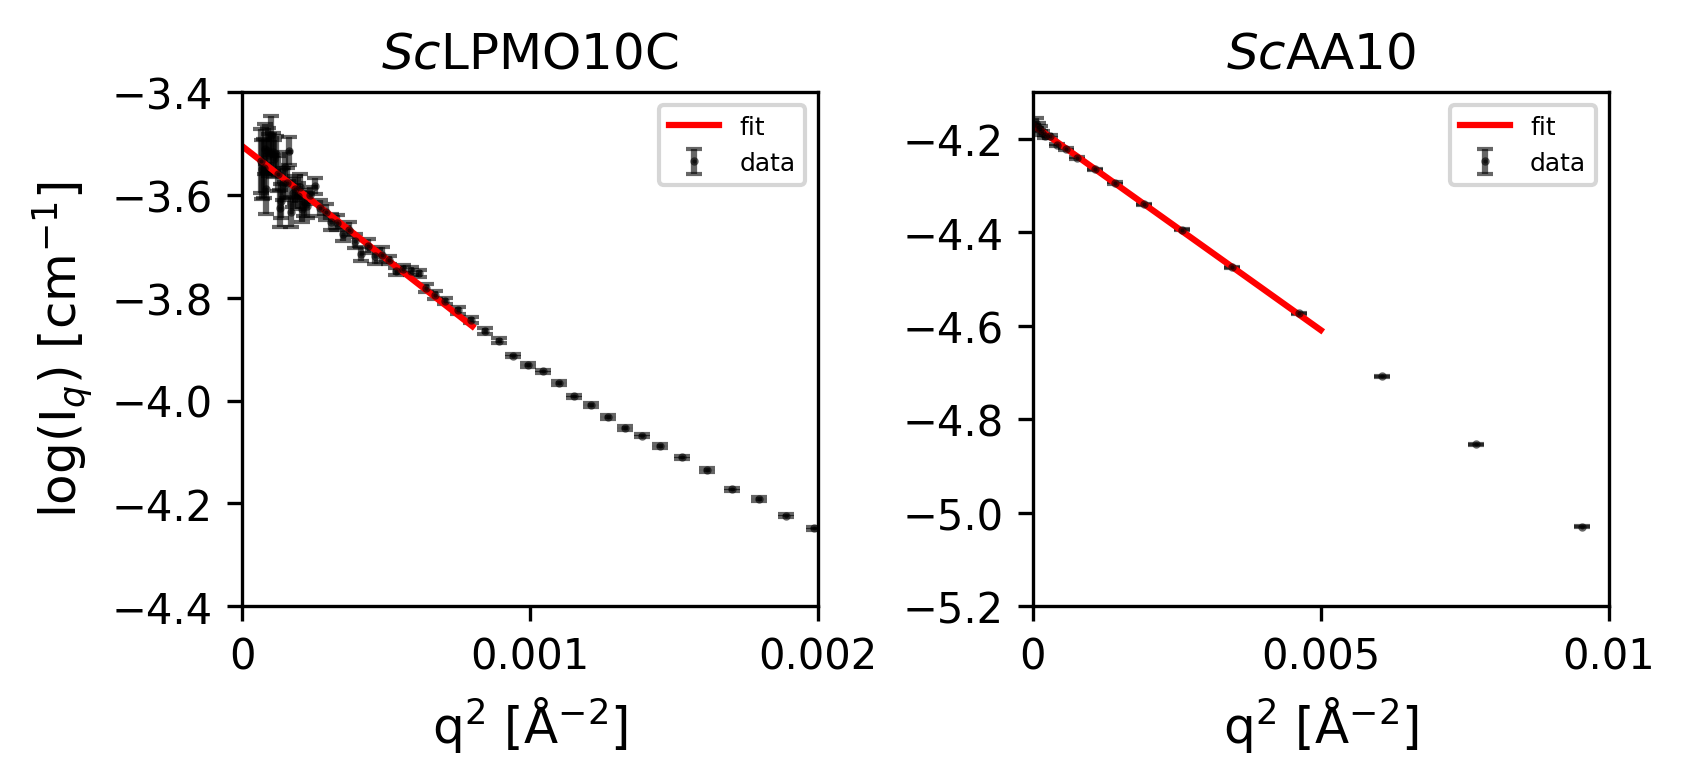

In [12]:


file_list = ['data_WT_saxs_1.10.dat', 'crysol/aa10.fit']

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["red"]
c3 = sns.xkcd_rgb["sky blue"]
c4 = sns.xkcd_rgb["green"]
c5 = sns.xkcd_rgb["orange"]
c6 = sns.xkcd_rgb["blue"]
c7 = sns.xkcd_rgb["denim blue"]
color_list = [c1,c2,c3,c4,c5,c6]

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=300,figsize=(5.5,2.5), gridspec_kw=dict(hspace=0.2),constrained_layout=True)


#plot saxs fitting

data = np.loadtxt(file_list[0])
x = data[:,0]
avg_exp = np.log(data[:,1])
sigma_exp = data[:,2]/data[:,1]

idx = np.where(x**2 < 0.0008)[-1][-1]

popt, pcov = curve_fit(line, (x**2)[:idx], avg_exp[:idx])
guinierx = np.linspace(0,0.0008, num=10)

ax[0].errorbar(x**2, avg_exp,yerr=sigma_exp,fmt='.', markersize=2, capsize=2, color=c1,alpha=0.6,label='data')
ax[0].plot(guinierx, line(guinierx, *popt), color='r', label='fit')
#ax[0].set_yscale('log')
ax[0].set_xlim(0,0.002)
ax[0].set_ylim(-4.4,-3.4)
ax[0].set_ylabel(r'log(I$_{q}$) [cm$^{-1}$]', fontsize=12)
ax[0].set_xlabel(r'q$^2$ [Å$^{-2}$]', fontsize=12)
ax[0].set_xticks([0,0.001, 0.002])
ax[0].set_xticklabels([0,0.001, 0.002])
ax[0].legend(fontsize=6)
ax[0].set_title('$Sc$LPMO10C')


data = np.loadtxt(file_list[1], skiprows=5)
x = data[:,0]
avg_exp = np.log(data[:,1])
sigma_exp = data[:,2]/data[:,1]

idx = np.where(x**2 < 0.005)[-1][-1]

popt, pcov = curve_fit(line, (x**2)[:idx], avg_exp[:idx])
guinierx = np.linspace(0,0.005, num=10)

ax[1].errorbar(x**2, avg_exp,yerr=sigma_exp,fmt='.', markersize=2, capsize=2, color=c1,alpha=0.6,label='data')
ax[1].plot(guinierx, line(guinierx, *popt), color='r', label='fit')
#ax[0].set_yscale('log')
ax[1].set_xlim(0.0,0.01)
ax[1].set_ylim(-5.2,-4.1)
ax[1].set_xlabel(r'q$^2$ [Å$^{-2}$]', fontsize=12)
ax[1].set_xticks([0,0.005, 0.01])
ax[1].set_xticklabels([0,0.005, 0.01])
ax[1].legend(fontsize=6)
ax[1].set_title('$Sc$AA10')

plt.savefig('guinier.png', dpi=300)
plt.show()
